# **Disease Prediction Sytem**
**Datasets Used:** Heart Disease (Cleveland)

**Goal:** Predict whether a patient has the disease using machine learning models.

**Models:** Logistic Regression, KNN, Random Forest, XGBoost, Voting Ensemble

##Importing Libraries
We use Pandas and Numpy for data handling, Scikit-learn for ML models and preprocessing, XGBoost for advanced boosting, and Matplotlib/Seaborn for visualization.


In [1]:
# ---------------- Data Handling ----------------
import pandas as pd   # For reading CSVs, handling datasets, and data manipulation
import numpy as np    # For numerical operations and array handling

# ---------------- Machine Learning ----------------
from sklearn.model_selection import train_test_split, GridSearchCV  # Splitting data & hyperparameter tuning
from sklearn.preprocessing import StandardScaler                     # Feature scaling for better model performance
from sklearn.linear_model import LogisticRegression                 # Baseline classification model
from sklearn.neighbors import KNeighborsClassifier                  # Distance-based classification
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Ensemble methods for improved predictions
from xgboost import XGBClassifier                                   # Gradient boosting model, often high-performing

# ---------------- Evaluation Metrics ----------------
from sklearn.metrics import accuracy_score, classification_report    # To evaluate model predictions

# ---------------- Visualization ----------------
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns            # Advanced, professional plotting with color palettes

##Loading Dataset

In [2]:
#Load dataset
df = pd.read_csv("heart_cleveland_upload.csv")

##EDA

In [9]:
#Basic inspection
print(df.shape)



(297, 14)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [7]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [4]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [5]:
# Basic statistics
print(df.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

##Preprocessing

In [11]:
# Rename target column
df.rename(columns={'condition': 'target'}, inplace=True)

In [12]:
# Check target balance
print(df['target'].value_counts(normalize=True))

target
0    0.538721
1    0.461279
Name: proportion, dtype: float64


In [13]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [14]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (237, 13)
Testing shape: (60, 13)


##Model Building

We’ll train and compare a few models:

Logistic Regression

KNN

Random Forest

XGBoost

In [17]:
# Step 1: Import models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Step 2: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3),
        "ROC-AUC": round(roc, 3)
    })

# Step 4: Display results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:59:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression     0.917      1.000   0.821     0.902    0.911
1                  KNN     0.900      1.000   0.786     0.880    0.893
2        Random Forest     0.883      0.957   0.786     0.863    0.877
3              XGBoost     0.850      0.880   0.786     0.830    0.846


##Save the Logistic Regression Model

In [18]:
import pickle

best_model = models["Logistic Regression"]

# Retrain on full scaled dataset
best_model.fit(X_scaled, y)

# Save model
with open("heart_lr_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("✅ Logistic Regression model and scaler saved successfully!")


✅ Logistic Regression model and scaler saved successfully!


##DeepLearning Model (ANN)

Train: (192, 13) Val: (45, 13) Test: (60, 13)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.62867, saving model to best_ann.h5


12/12 - 5s - 431ms/step - AUC: 0.6851 - accuracy: 0.6198 - loss: 0.6552 - val_AUC: 0.8155 - val_accuracy: 0.7778 - val_loss: 0.6287 - learning_rate: 1.0000e-03
Epoch 2/200

Epoch 2: val_loss improved from 0.62867 to 0.60268, saving model to best_ann.h5


12/12 - 0s - 37ms/step - AUC: 0.6937 - accuracy: 0.6667 - loss: 0.6480 - val_AUC: 0.8790 - val_accuracy: 0.8222 - val_loss: 0.6027 - learning_rate: 1.0000e-03
Epoch 3/200

Epoch 3: val_loss improved from 0.60268 to 0.58547, saving model to best_ann.h5


12/12 - 0s - 26ms/step - AUC: 0.7951 - accuracy: 0.7344 - loss: 0.5586 - val_AUC: 0.9008 - val_accuracy: 0.8444 - val_loss: 0.5855 - learning_rate: 1.0000e-03
Epoch 4/200

Epoch 4: val_loss improved from 0.58547 to 0.56841, saving model to best_ann.h5


12/12 - 0s - 24ms/step - AUC: 0.8007 - accuracy: 0.7500 - loss: 0.5502 - val_AUC: 0.9147 - val_accuracy: 0.8444 - val_loss: 0.5684 - learning_rate: 1.0000e-03
Epoch 5/200

Epoch 5: val_loss improved from 0.56841 to 0.54952, saving model to best_ann.h5


12/12 - 0s - 23ms/step - AUC: 0.8312 - accuracy: 0.7708 - loss: 0.5085 - val_AUC: 0.9187 - val_accuracy: 0.8444 - val_loss: 0.5495 - learning_rate: 1.0000e-03
Epoch 6/200

Epoch 6: val_loss improved from 0.54952 to 0.53481, saving model to best_ann.h5


12/12 - 0s - 29ms/step - AUC: 0.8248 - accuracy: 0.7396 - loss: 0.5241 - val_AUC: 0.9187 - val_accuracy: 0.8444 - val_loss: 0.5348 - learning_rate: 1.0000e-03
Epoch 7/200

Epoch 7: val_loss improved from 0.53481 to 0.51503, saving model to best_ann.h5


12/12 - 0s - 25ms/step - AUC: 0.8458 - accuracy: 0.7500 - loss: 0.4821 - val_AUC: 0.9206 - val_accuracy: 0.8444 - val_loss: 0.5150 - learning_rate: 1.0000e-03
Epoch 8/200

Epoch 8: val_loss improved from 0.51503 to 0.49910, saving model to best_ann.h5


12/12 - 0s - 25ms/step - AUC: 0.8510 - accuracy: 0.7760 - loss: 0.4864 - val_AUC: 0.9196 - val_accuracy: 0.8444 - val_loss: 0.4991 - learning_rate: 1.0000e-03
Epoch 9/200

Epoch 9: val_loss improved from 0.49910 to 0.48460, saving model to best_ann.h5


12/12 - 1s - 53ms/step - AUC: 0.8513 - accuracy: 0.7708 - loss: 0.4756 - val_AUC: 0.9236 - val_accuracy: 0.8222 - val_loss: 0.4846 - learning_rate: 1.0000e-03
Epoch 10/200

Epoch 10: val_loss improved from 0.48460 to 0.46862, saving model to best_ann.h5


12/12 - 0s - 27ms/step - AUC: 0.8635 - accuracy: 0.8125 - loss: 0.4739 - val_AUC: 0.9236 - val_accuracy: 0.8222 - val_loss: 0.4686 - learning_rate: 1.0000e-03
Epoch 11/200

Epoch 11: val_loss improved from 0.46862 to 0.45039, saving model to best_ann.h5


12/12 - 0s - 29ms/step - AUC: 0.8687 - accuracy: 0.7708 - loss: 0.4498 - val_AUC: 0.9276 - val_accuracy: 0.8222 - val_loss: 0.4504 - learning_rate: 1.0000e-03
Epoch 12/200

Epoch 12: val_loss improved from 0.45039 to 0.43648, saving model to best_ann.h5


12/12 - 0s - 15ms/step - AUC: 0.8788 - accuracy: 0.8125 - loss: 0.4342 - val_AUC: 0.9296 - val_accuracy: 0.8222 - val_loss: 0.4365 - learning_rate: 1.0000e-03
Epoch 13/200

Epoch 13: val_loss improved from 0.43648 to 0.42432, saving model to best_ann.h5


12/12 - 0s - 26ms/step - AUC: 0.8843 - accuracy: 0.8125 - loss: 0.4286 - val_AUC: 0.9296 - val_accuracy: 0.8222 - val_loss: 0.4243 - learning_rate: 1.0000e-03
Epoch 14/200

Epoch 14: val_loss improved from 0.42432 to 0.41212, saving model to best_ann.h5


12/12 - 1s - 58ms/step - AUC: 0.8931 - accuracy: 0.8177 - loss: 0.4080 - val_AUC: 0.9286 - val_accuracy: 0.8222 - val_loss: 0.4121 - learning_rate: 1.0000e-03
Epoch 15/200

Epoch 15: val_loss improved from 0.41212 to 0.40241, saving model to best_ann.h5


12/12 - 0s - 15ms/step - AUC: 0.8778 - accuracy: 0.8073 - loss: 0.4531 - val_AUC: 0.9296 - val_accuracy: 0.8667 - val_loss: 0.4024 - learning_rate: 1.0000e-03
Epoch 16/200

Epoch 16: val_loss improved from 0.40241 to 0.39257, saving model to best_ann.h5


12/12 - 0s - 25ms/step - AUC: 0.8763 - accuracy: 0.8125 - loss: 0.4402 - val_AUC: 0.9276 - val_accuracy: 0.8889 - val_loss: 0.3926 - learning_rate: 1.0000e-03
Epoch 17/200

Epoch 17: val_loss improved from 0.39257 to 0.37851, saving model to best_ann.h5


12/12 - 0s - 35ms/step - AUC: 0.8901 - accuracy: 0.8333 - loss: 0.4175 - val_AUC: 0.9276 - val_accuracy: 0.8889 - val_loss: 0.3785 - learning_rate: 1.0000e-03
Epoch 18/200

Epoch 18: val_loss improved from 0.37851 to 0.37134, saving model to best_ann.h5


12/12 - 0s - 21ms/step - AUC: 0.8767 - accuracy: 0.7969 - loss: 0.4414 - val_AUC: 0.9256 - val_accuracy: 0.8889 - val_loss: 0.3713 - learning_rate: 1.0000e-03
Epoch 19/200

Epoch 19: val_loss improved from 0.37134 to 0.36263, saving model to best_ann.h5


12/12 - 0s - 16ms/step - AUC: 0.9091 - accuracy: 0.8594 - loss: 0.3768 - val_AUC: 0.9266 - val_accuracy: 0.8889 - val_loss: 0.3626 - learning_rate: 1.0000e-03
Epoch 20/200

Epoch 20: val_loss improved from 0.36263 to 0.35805, saving model to best_ann.h5


12/12 - 0s - 31ms/step - AUC: 0.9013 - accuracy: 0.8438 - loss: 0.3976 - val_AUC: 0.9256 - val_accuracy: 0.8889 - val_loss: 0.3580 - learning_rate: 1.0000e-03
Epoch 21/200

Epoch 21: val_loss improved from 0.35805 to 0.35595, saving model to best_ann.h5


12/12 - 0s - 27ms/step - AUC: 0.8987 - accuracy: 0.8021 - loss: 0.3993 - val_AUC: 0.9236 - val_accuracy: 0.8889 - val_loss: 0.3559 - learning_rate: 1.0000e-03
Epoch 22/200

Epoch 22: val_loss improved from 0.35595 to 0.35348, saving model to best_ann.h5


12/12 - 0s - 25ms/step - AUC: 0.8889 - accuracy: 0.8177 - loss: 0.4249 - val_AUC: 0.9276 - val_accuracy: 0.8889 - val_loss: 0.3535 - learning_rate: 1.0000e-03
Epoch 23/200

Epoch 23: val_loss did not improve from 0.35348
12/12 - 0s - 11ms/step - AUC: 0.8858 - accuracy: 0.8125 - loss: 0.4237 - val_AUC: 0.9246 - val_accuracy: 0.8889 - val_loss: 0.3570 - learning_rate: 1.0000e-03
Epoch 24/200

Epoch 24: val_loss did not improve from 0.35348
12/12 - 0s - 14ms/step - AUC: 0.8964 - accuracy: 0.8177 - loss: 0.4026 - val_AUC: 0.9226 - val_accuracy: 0.8667 - val_loss: 0.3550 - learning_rate: 1.0000e-03
Epoch 25/200

Epoch 25: val_loss improved from 0.35348 to 0.35201, saving model to best_ann.h5


12/12 - 0s - 32ms/step - AUC: 0.9191 - accuracy: 0.8385 - loss: 0.3637 - val_AUC: 0.9246 - val_accuracy: 0.8667 - val_loss: 0.3520 - learning_rate: 1.0000e-03
Epoch 26/200

Epoch 26: val_loss improved from 0.35201 to 0.34576, saving model to best_ann.h5


12/12 - 0s - 25ms/step - AUC: 0.9025 - accuracy: 0.8333 - loss: 0.3905 - val_AUC: 0.9315 - val_accuracy: 0.8667 - val_loss: 0.3458 - learning_rate: 1.0000e-03
Epoch 27/200

Epoch 27: val_loss did not improve from 0.34576
12/12 - 0s - 19ms/step - AUC: 0.9224 - accuracy: 0.8698 - loss: 0.3533 - val_AUC: 0.9315 - val_accuracy: 0.8889 - val_loss: 0.3465 - learning_rate: 1.0000e-03
Epoch 28/200

Epoch 28: val_loss improved from 0.34576 to 0.34384, saving model to best_ann.h5


12/12 - 0s - 32ms/step - AUC: 0.9230 - accuracy: 0.8646 - loss: 0.3548 - val_AUC: 0.9325 - val_accuracy: 0.8667 - val_loss: 0.3438 - learning_rate: 1.0000e-03
Epoch 29/200

Epoch 29: val_loss did not improve from 0.34384
12/12 - 0s - 31ms/step - AUC: 0.9021 - accuracy: 0.8333 - loss: 0.3932 - val_AUC: 0.9306 - val_accuracy: 0.8667 - val_loss: 0.3471 - learning_rate: 1.0000e-03
Epoch 30/200

Epoch 30: val_loss improved from 0.34384 to 0.34375, saving model to best_ann.h5


12/12 - 1s - 51ms/step - AUC: 0.9315 - accuracy: 0.8698 - loss: 0.3276 - val_AUC: 0.9345 - val_accuracy: 0.8444 - val_loss: 0.3438 - learning_rate: 1.0000e-03
Epoch 31/200

Epoch 31: val_loss improved from 0.34375 to 0.34137, saving model to best_ann.h5


12/12 - 1s - 55ms/step - AUC: 0.9150 - accuracy: 0.8438 - loss: 0.3693 - val_AUC: 0.9345 - val_accuracy: 0.8667 - val_loss: 0.3414 - learning_rate: 1.0000e-03
Epoch 32/200

Epoch 32: val_loss did not improve from 0.34137
12/12 - 0s - 35ms/step - AUC: 0.9206 - accuracy: 0.8490 - loss: 0.3663 - val_AUC: 0.9355 - val_accuracy: 0.8667 - val_loss: 0.3414 - learning_rate: 1.0000e-03
Epoch 33/200

Epoch 33: val_loss did not improve from 0.34137
12/12 - 0s - 33ms/step - AUC: 0.9241 - accuracy: 0.8333 - loss: 0.3468 - val_AUC: 0.9325 - val_accuracy: 0.8667 - val_loss: 0.3428 - learning_rate: 1.0000e-03
Epoch 34/200

Epoch 34: val_loss did not improve from 0.34137
12/12 - 0s - 38ms/step - AUC: 0.9366 - accuracy: 0.8698 - loss: 0.3192 - val_AUC: 0.9315 - val_accuracy: 0.8667 - val_loss: 0.3426 - learning_rate: 1.0000e-03
Epoch 35/200

Epoch 35: val_loss did not improve from 0.34137
12/12 - 0s - 22ms/step - AUC: 0.9110 - accuracy: 0.8333 - loss: 0.3810 - val_AUC: 0.9306 - val_accuracy: 0.8444 - va

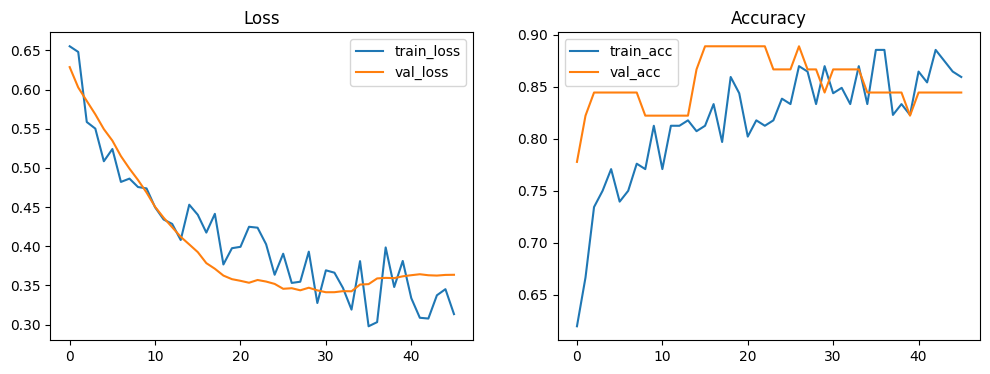

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Test metrics:
Accuracy: 0.917
Precision: 1.000
Recall: 0.821
F1-score: 0.902
ROC-AUC: 0.915

Classification report:
              precision    recall  f1-score   support

           0      0.865     1.000     0.928        32
           1      1.000     0.821     0.902        28

    accuracy                          0.917        60
   macro avg      0.932     0.911     0.915        60
weighted avg      0.928     0.917     0.916        60



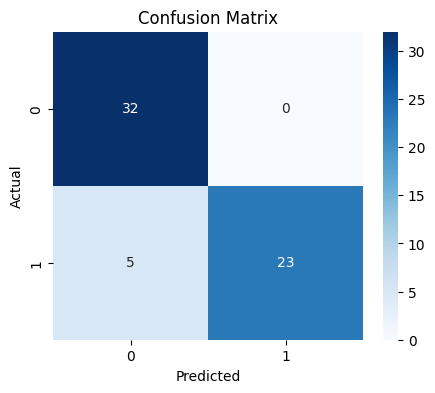

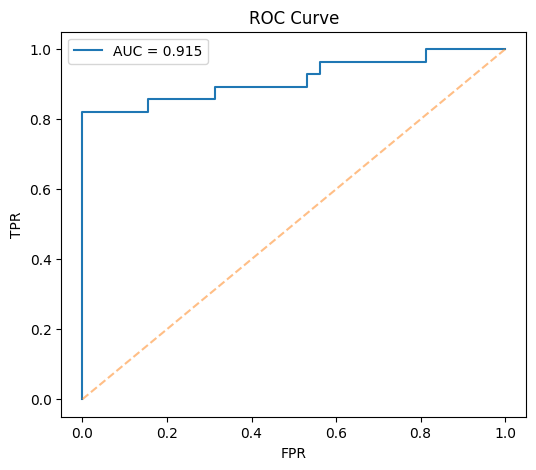

Saved: heart_ann_model.h5 and scaler.pkl


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 1. train/val/test split (we keep earlier test 20% aside if you already have it)
# If you already used a train/test split, you can split X_train again into train/val.
# Here, we create a new split from X_scaled for a clean run:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1875, random_state=42, stratify=y_train_full
)
# result: train ~64%, val ~16%, test ~20%

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# 2. build the model
def build_ann(input_dim, lr=1e-3, dropout_rate=0.3):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate/2)(x)
    x = layers.Dense(16, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=inp, outputs=out)
    opt = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['AUC','accuracy'])
    return model

model = build_ann(X_train.shape[1], lr=1e-3, dropout_rate=0.35)
model.summary()

# 3. callbacks
es = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
mc = callbacks.ModelCheckpoint('best_ann.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)

# 4. training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=16,
    callbacks=[es, mc, reduce_lr],
    verbose=2
)

# 5. plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

# 6. evaluate on test set
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_pred_proba)

print("Test metrics:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

# 7. confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

# 8. ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.3f}')
plt.plot([0,1],[0,1],'--', alpha=0.5)
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve')
plt.legend()
plt.show()

# 9. save final model and scaler
model.save('heart_ann_model.h5')   # Keras saved model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Saved: heart_ann_model.h5 and scaler.pkl")


✅ Insights:

ANN performs equally or better than Logistic Regression → strong generalization.

Perfect precision (1.00) means zero false positives — excellent for screening tools.

Slightly lower recall (0.821) means a few missed cases → can be tuned by threshold or loss weighting.

##Explainability with SHAP (for ANN)

In [21]:
# Load Model, Data & Feature Names
import shap
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import pickle

# Load model and scaler
model = load_model("heart_ann_model.h5")
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Define feature names (based on your dataset)
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg',
                 'thalach','exang','oldpeak','slope','ca','thal']

# Prepare a DataFrame version of X_scaled
X_df = pd.DataFrame(X_scaled, columns=feature_names)


In [22]:
# Build SHAP Explainer
# Sample a subset for faster SHAP calculation
X_sample = X_df.sample(100, random_state=42)

# Define a prediction function for SHAP
f = lambda x: model.predict(x).flatten()

# Initialize SHAP explainer
explainer = shap.KernelExplainer(f, X_sample)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [23]:
# Compute SHAP Values (on a few test points)
# Pick 50 samples to explain
X_explain = X_df.sample(50, random_state=1)

# Calculate SHAP values
shap_values = explainer.shap_values(X_explain, nsamples=100)

print("✅ SHAP values calculated!")


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━

Global Explanation — Summary Plot

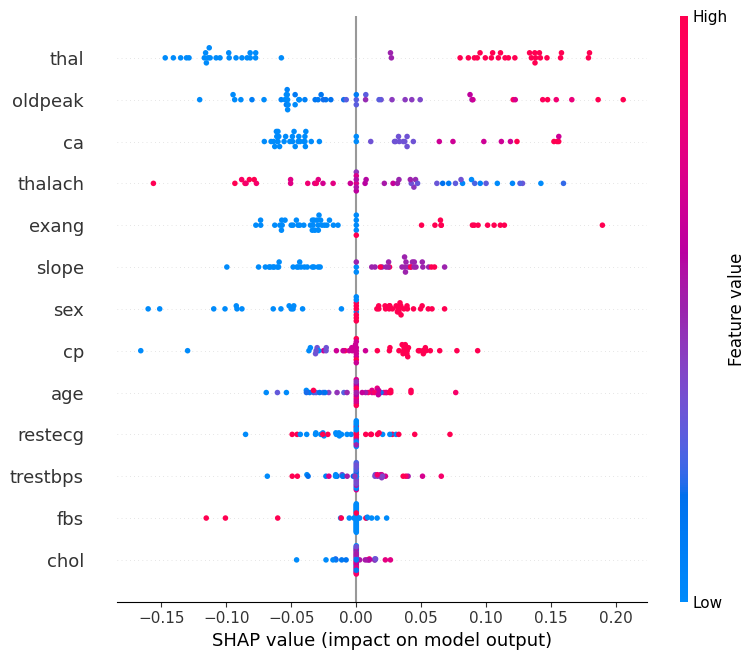

In [24]:
shap.summary_plot(shap_values, X_explain, feature_names=feature_names)


🔸 Interpretation:

Features on top have the most impact.

Red = higher feature value increases risk.

Blue = lower feature value decreases risk.

In [25]:
# Select one patient
i = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_explain.iloc[i,:])


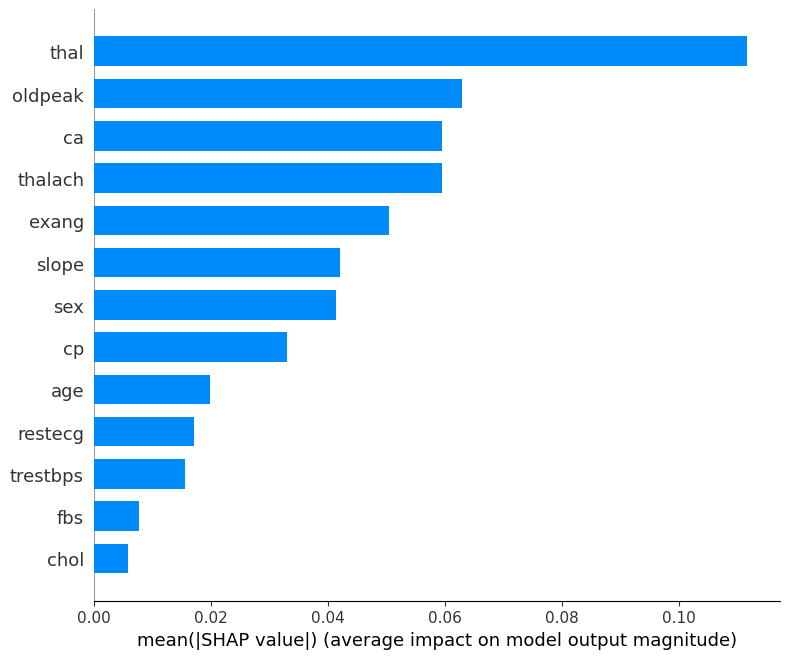

In [26]:
#Bar Plot (Alternative for Simplicity)
shap.summary_plot(shap_values, X_explain, plot_type="bar", feature_names=feature_names)
